
# Project: Investigate a Dataset - [No-show appointments]

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

### Dataset Description 

in this dataset I will analyze the Medical Appointment No Shows, 
110.527 medical appointments its 14 associated variables (characteristics). The most important one if the patient show-up or no-show to the appointment.
 


### Question(s) for Analysis

What is the percentage of patients who show up on their appointements vs. who don't?

does the period between the scheduled day appointment and the actual appointment day is influencing the attendance?

where is the most appointment take place ?

does Hipertension effects the patients showing up  ?

who is more commited to medical schedules older patients or younger ones ?

does alcohol effect on patients showing up for their appointments ?

does Handcap lead to patients missing their appointment ?

In [38]:
# Use this cell to set up import statements for all of the packages that you
#   plan to use.

# Remember to include a 'magic word' so that your visualizations are plotted
#   inline with the notebook. See this page for more:
#   http://ipython.readthedocs.io/en/stable/interactive/magics.html


import pandas as pd 
import matplotlib.pyplot as plt 
% matplotlib inline
import numpy as np 
import math 
import seaborn as sns

<a id='wrangling'></a>
## Data Wrangling


In [39]:
# Load your data and print out a few lines. Perform operations to inspect data
#   types and look for instances of missing or possibly errant data.
url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/October/59dd2e9a_noshowappointments-kagglev2-may-2016/noshowappointments-kagglev2-may-2016.csv'
df = pd.read_csv(url)
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


# exploring the dataset 

In [40]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
PatientId         110527 non-null float64
AppointmentID     110527 non-null int64
Gender            110527 non-null object
ScheduledDay      110527 non-null object
AppointmentDay    110527 non-null object
Age               110527 non-null int64
Neighbourhood     110527 non-null object
Scholarship       110527 non-null int64
Hipertension      110527 non-null int64
Diabetes          110527 non-null int64
Alcoholism        110527 non-null int64
Handcap           110527 non-null int64
SMS_received      110527 non-null int64
No-show           110527 non-null object
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


this shows that we have 14 columns in total besides index, and we have 110527 record.

patientId is float while it supposed to be an integer.

Convert Scheduled and Appointment columns to date time.

Remove Row(s) with Negative Age Value(s):

In [41]:
# how many columns and rows in our dataset ?
df.shape

(110527, 14)

In [42]:
# how many null values in our dataset ?
df.isnull().sum()

PatientId         0
AppointmentID     0
Gender            0
ScheduledDay      0
AppointmentDay    0
Age               0
Neighbourhood     0
Scholarship       0
Hipertension      0
Diabetes          0
Alcoholism        0
Handcap           0
SMS_received      0
No-show           0
dtype: int64

In [43]:
# let's explore some statistics about our dataset 
df.describe()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,3.921784e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172614e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439172e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


**our dataset has no null values**

In [44]:
# how many duplicates values in our dataset ?
df.duplicated().sum()

0

**our dataset has no duplicated values**


### Data Cleaning

Data cleansing or data cleaning is the process of detecting and correcting (or removing) corrupt or inaccurate records from a record set, table, or database and refers to identifying incomplete, incorrect, inaccurate or irrelevant parts of the data and then replacing, modifying, or deleting the dirty or coarse data.


In [45]:
# After discussing the structure of the data and any problems that need to be
#   cleaned, perform those cleaning steps in the second part of this section.


 **1 - Edit the "ScheduledDay", and "AppointmentDay" Columns' Datatype to be Datetime**

In [46]:
df['ScheduledDay'] = pd.to_datetime(df['ScheduledDay'])

In [47]:
df['AppointmentDay'] = pd.to_datetime(df['AppointmentDay'])

In [48]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
PatientId         110527 non-null float64
AppointmentID     110527 non-null int64
Gender            110527 non-null object
ScheduledDay      110527 non-null datetime64[ns]
AppointmentDay    110527 non-null datetime64[ns]
Age               110527 non-null int64
Neighbourhood     110527 non-null object
Scholarship       110527 non-null int64
Hipertension      110527 non-null int64
Diabetes          110527 non-null int64
Alcoholism        110527 non-null int64
Handcap           110527 non-null int64
SMS_received      110527 non-null int64
No-show           110527 non-null object
dtypes: datetime64[ns](2), float64(1), int64(8), object(3)
memory usage: 11.8+ MB


In [49]:
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29 18:38:08,2016-04-29,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29 16:08:27,2016-04-29,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29 16:19:04,2016-04-29,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29 17:29:31,2016-04-29,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29 16:07:23,2016-04-29,56,JARDIM DA PENHA,0,1,1,0,0,0,No


2 - Edit "PatientId" Column Datatype to be integer:

In [50]:
df['PatientId'] = df['PatientId'].astype(int)

In [51]:
# make sure the datatype changed
df.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
PatientId         110527 non-null int64
AppointmentID     110527 non-null int64
Gender            110527 non-null object
ScheduledDay      110527 non-null datetime64[ns]
AppointmentDay    110527 non-null datetime64[ns]
Age               110527 non-null int64
Neighbourhood     110527 non-null object
Scholarship       110527 non-null int64
Hipertension      110527 non-null int64
Diabetes          110527 non-null int64
Alcoholism        110527 non-null int64
Handcap           110527 non-null int64
SMS_received      110527 non-null int64
No-show           110527 non-null object
dtypes: datetime64[ns](2), int64(9), object(3)
memory usage: 11.8+ MB


#### let's explore for extreme values

In [52]:
df.max()

PatientId             999981631772427
AppointmentID                 5790484
Gender                              M
ScheduledDay      2016-06-08 20:07:23
AppointmentDay    2016-06-08 00:00:00
Age                               115
Neighbourhood              VILA RUBIM
Scholarship                         1
Hipertension                        1
Diabetes                            1
Alcoholism                          1
Handcap                             4
SMS_received                        1
No-show                           Yes
dtype: object

In [53]:
df.min()

PatientId                       39217
AppointmentID                 5030230
Gender                              F
ScheduledDay      2015-11-10 07:13:56
AppointmentDay    2016-04-29 00:00:00
Age                                -1
Neighbourhood               AEROPORTO
Scholarship                         0
Hipertension                        0
Diabetes                            0
Alcoholism                          0
Handcap                             0
SMS_received                        0
No-show                            No
dtype: object

#### here we found there is a nagative value in age, so let's drop it as it's illogical to have an age by negative 

3- Remove Row(s) with Negative Age Value(s):

In [54]:
df[df["Age"]<0]

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
99832,465943158731293,5775010,F,2016-06-06 08:58:13,2016-06-06,-1,ROMÃO,0,0,0,0,0,0,No


**there is only one row with this problem so let's drop it** 

In [55]:
df = df.drop([99832])

In [56]:
# check if the problem still there 
df[df["Age"]<0]

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show


<a id='eda'></a>
## Exploratory Data Analysis


### Research Q 1 (What is the percentage of patients who show up on their appointements vs. who don't?)

In [57]:
number_no_show_up = df[df["No-show"] == 'Yes']["PatientId"].count()
number_no_show_up

22319

In [58]:
number_show_up = df[df['No-show'] == 'No']['PatientId'].count()
number_show_up

88207

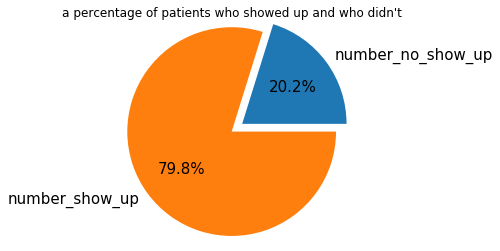

In [59]:
names = ['number_no_show_up', 'number_show_up']
results = [22319 , 88207]
plt.axis('equal')
plt.title("a percentage of patients who showed up and who didn't")
plt.pie(results, labels=names, explode=(0.15, 0), radius=1.2, autopct='%0.1f%%', textprops = {"fontsize":15});

#### this indicate that the patient who shows up to thier appointment is 79.8%
#### and the patients who didn't who up to thier appointment is 20.2% 

### Research Q 2  (does the period between the scheduled day appointment and the actual appointment day is influencing the attendance?)

In [60]:
# get duration between the two dates 
df['waiting'] = (df['AppointmentDay'].dt.date) - (df['ScheduledDay'].dt.date)

In [61]:
# remove the days text 
df['waiting'] = df['waiting'].dt.days

In [62]:
# get the average of both patients who did show up and who didn't 
waitTime = df.groupby('No-show')['waiting'].mean()
waitTime

No-show
No      8.754759
Yes    15.831489
Name: waiting, dtype: float64

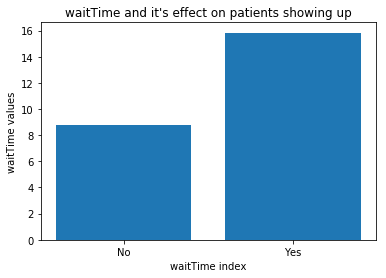

In [63]:
plt.bar(waitTime.index, waitTime.values)
plt.title("waitTime and it's effect on patients showing up")
plt.xlabel('waitTime index')
plt.ylabel('waitTime values');

##### this indcate that patients who attend have a less waiting time than patients who don’t
##### patients whom didn't show up have an average of 15 days of waiting before the appointment 
##### patients whom did show up have an average of 8 days of waiting before the appointment 


### Research Q 3 (where is the most appointment take place ?)

In [64]:
df['Neighbourhood'].mode()[0]

'JARDIM CAMBURI'

##### here it shows us that most appointment has been in **JARDIM CAMBURI** Neighbourhood

### Research Q 4 (does Hipertension effects the patients showing up  ?)

In [65]:
Hipertension_effect = df.groupby(['No-show','Hipertension'], as_index=False).size()
Hipertension_effect

No-show  Hipertension
No       0               70178
         1               18029
Yes      0               18547
         1                3772
dtype: int64

In [66]:
# let's get the mean of patients that have Hipertension for who attended and whom are not 
# no == they actully attended 
# yes == they they didn't attend

df.groupby('No-show')['Hipertension'].mean()

No-show
No     0.204394
Yes    0.169004
Name: Hipertension, dtype: float64

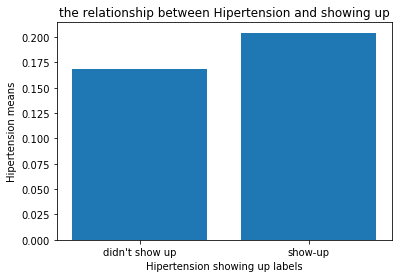

In [67]:
hiper_labels = ["show-up", "didn't show up"]
means_data = [0.204394 , 0.169004]
plt.bar(hiper_labels , means_data)
plt.title('the relationship between Hipertension and showing up')
plt.xlabel('Hipertension showing up labels')
plt.ylabel('Hipertension means');

#### this indicate that Hipertension doesn't have a direct effect on patients show up or not as it marely made a difference between both cases

### Research Q 5 (who is more committed to medical schedules older patients or younger ones ?)

In [68]:
# let's first categorize ages:
bins = [0,5,15,20,50,120]
labels = ['child', 'kid', 'teen', 'adult', 'elderly']
df['age_segmentation'] = pd.cut(df['Age'], bins=bins, labels=labels, right=False)


In [69]:
# let's calculate mean for each category 
df.groupby('age_segmentation')['No-show'].value_counts()

age_segmentation  No-show
child             No          8377
                  Yes         1865
kid               No          9954
                  Yes         3061
teen              No          5339
                  Yes         1815
adult             No         33519
                  Yes         9560
elderly           No         31018
                  Yes         6018
Name: No-show, dtype: int64

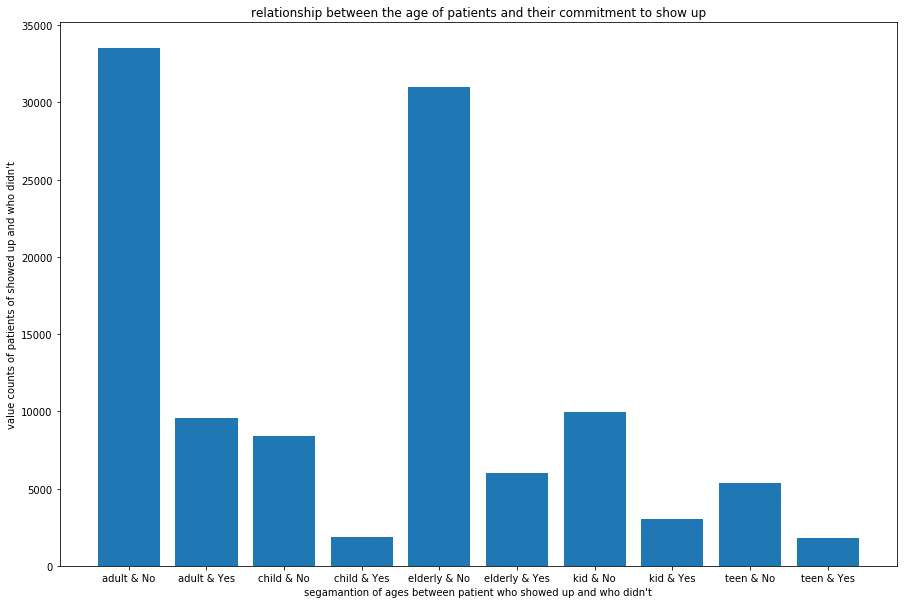

In [70]:
labels = ["child & No","child & Yes","kid & No", "kid & Yes", "teen & No", "teen & Yes", "adult & No", "adult & Yes", "elderly & No", "elderly & Yes"]
data = [8377, 1865, 9954, 3061, 5339, 1815, 33519, 9560, 31018, 6018]
plt.figure(figsize=(15,10)) 
plt.bar(x=labels, height=data)
plt.title('relationship between the age of patients and their commitment to show up')
plt.ylabel("value counts of patients of showed up and who didn't")
plt.xlabel("segamantion of ages between patient who showed up and who didn't");

#### the above analysis indicate that older patients are more committed to showing up than younger patients 
#### as the differance between showing up or not for elders and adults are higher than the younger ones 
#### the graph shows us significant increase in showing up for older patients 

### Research Q 6 (does alcohol effect on patients showing up for their appointments ?)

In [71]:
alcohol_effect = df.groupby('No-show')['Alcoholism'].sum()
labels = ['No', 'Yes']
def plotting(df, showed, showednot):
    plt.bar(x=labels, height=alcohol_effect)
    plt.title('relationship between alcoholism and showing up by patients')
    plt.xlabel('alcolohlism')
    plt.ylabel('No-show');

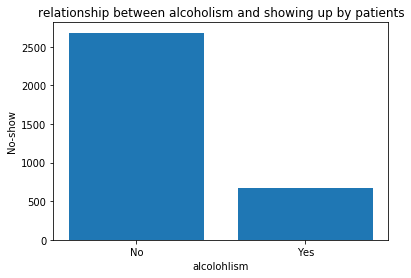

In [72]:
plotting(df,'No', 'Yes')

#### alcohol doesn't make patients miss their appointments cuase most of them had shown up  

### Research Q 7 (does Handcap lead to patients missing their appointment ?)

In [73]:
# let's see what does happen every time the handcap increases 
table = pd.crosstab(df['Handcap'],df['No-show'])
table

No-show,No,Yes
Handcap,,
0,86373,21912
1,1676,366
2,146,37
3,10,3
4,2,1


#### as shown in the above table the handicap does signfically effect showing up for the patients becuase everytime it increase by one
#### the showing up of patients decreases 


<a id='conclusions'></a>
## Conclusions
Percentage of patients who show up on their appointments represents 79.8%

Percentage of patients who Don't show up on their appointments represents 20.2%

patients who attend have a less waiting time than patients who don’t

patients whom didn't show up have an average of 15 days of waiting before the appointment

patients whom did show up have an average of 8 days of waiting before the appointment

most appointment has been in JARDIM CAMBURI Neighbourhood

Hipertension doesn't have a direct effect on patients show up or not as it marely made a difference between both cases

older patients are more committed to showing up than younger patients

alcohol doesn't make patients miss their appointments cuase most of them had shown up

handicap does signfically effect showing up for the patients as it has negative effect on the patients for showing up 

<a id='limitations'></a>
## limitations

can not show strong correlations between factors since most of our data is categorical

I assumed age of 0 relates to newborns or a recored error 

It believe it would be useful, if there's a column to indicate whether there's a puplic transportaion in the Neighbourhood or not.

i believe if we had some information about the level of income of the patients or medical price for the appointments
it would be very beneficial, leading us to do further investagation 


In [74]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])

0